# IMPORTING PACKAGES

In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import sklearn

# LOAD THE DATA


In [39]:
df=pd.read_csv('./Salary_Data.csv')

In [40]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [42]:
len(df)

30

In [43]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [44]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# COMPLETE DATA VISUALIZATION

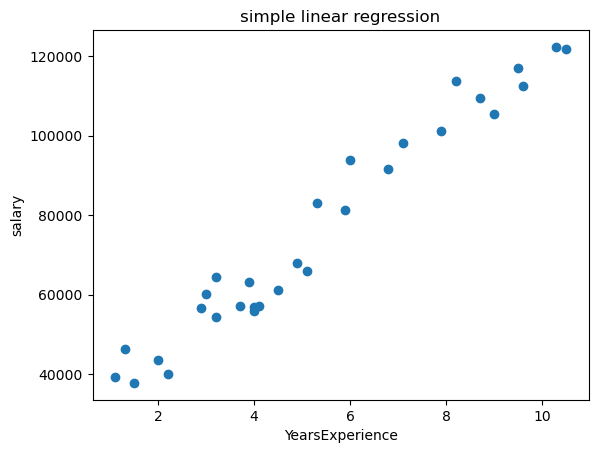

In [45]:
plt.title('simple linear regression')
plt.xlabel('YearsExperience')
plt.ylabel('salary')
plt.scatter(df['YearsExperience'],df['Salary'])
plt.show()

# SPLIT THE DATA

In [46]:
X=df['YearsExperience']
Y=df['Salary']


In [47]:
Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [48]:
X=X.values.reshape(-1,1)

In [49]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [50]:
df['YearsExperience'].head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

# SPLITTING THE DATA INTO TRAIN AND TEST

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)


In [53]:
x_train

array([[ 2.2],
       [ 5.1],
       [ 2.9],
       [ 4.1],
       [ 4. ],
       [ 7.9],
       [ 1.3],
       [ 1.5],
       [ 9. ],
       [ 2. ],
       [ 7.1],
       [ 9.5],
       [ 5.9],
       [10.5],
       [ 6.8],
       [ 3.2],
       [ 3.9],
       [ 4.5],
       [ 6. ],
       [ 3. ]])

In [55]:
y_train

4      39891.0
16     66029.0
5      56642.0
13     57081.0
11     55794.0
22    101302.0
1      46205.0
2      37731.0
25    105582.0
3      43525.0
21     98273.0
26    116969.0
18     81363.0
29    121872.0
20     91738.0
7      54445.0
10     63218.0
14     61111.0
19     93940.0
6      60150.0
Name: Salary, dtype: float64

In [58]:
len(x_train),len(y_train)

(20, 20)

# PLOTTING THE TRAINING DATA

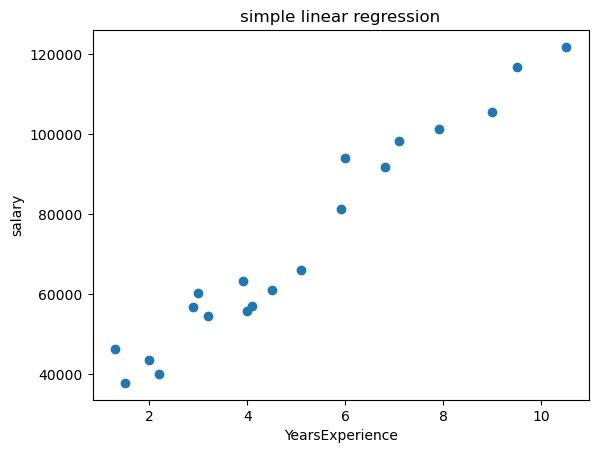

In [59]:
plt.title('simple linear regression')
plt.xlabel('YearsExperience')
plt.ylabel('salary')
plt.scatter(x_train,y_train)
plt.show()


# FEEDING THE TRAINING DATA TO THE ALGORITHM

In [63]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()


In [64]:
reg.fit(x_train, y_train)

LinearRegression()

# checking the model 

In [65]:
reg.coef_

array([9426.03876907])

In [66]:
reg.intercept_

25324.335379244316

# THE MODEL IS Y=MX+C    -->Y=9426.03876907* X + 25324.33 IS OUR MODEL FOR PREDICTIONS

# checking the performance of the training data

In [76]:
x_train_1=x_train.flatten()
x_train_1.shape

(20,)

In [75]:
y_train_pred=reg.predict(x_train)
y_train_pred

array([ 46061.62067121,  73397.13310153,  52659.84780956,  63971.09433245,
        63028.49045554,  99790.04165494,  37578.18577904,  39463.39353286,
       110158.68430092,  44176.41291739,  92249.21063968, 114871.70368546,
        80937.96411679, 124297.74245453,  89421.39900895,  55487.65944028,
        62085.88657864,  67741.50984008,  81880.56799369,  53602.45168647])

In [78]:
traindatacomparison=pd.DataFrame({'x_train':x_train_1,"y_train_actual":y_train,"y_train_pred":y_train_pred})
traindatacomparison

,x_train,y_train_actual,y_train_pred
4,2.2,39891.0,46061.620671
16,5.1,66029.0,73397.133102
5,2.9,56642.0,52659.847810
13,4.1,57081.0,63971.094332
11,4.0,55794.0,63028.490456
22,7.9,101302.0,99790.041655
1,1.3,46205.0,37578.185779
2,1.5,37731.0,39463.393533
25,9.0,105582.0,110158.684301
3,2.0,43525.0,44176.412917


# PLOT THE Y TRAIN AND Y TRAIN PREDICTIONS

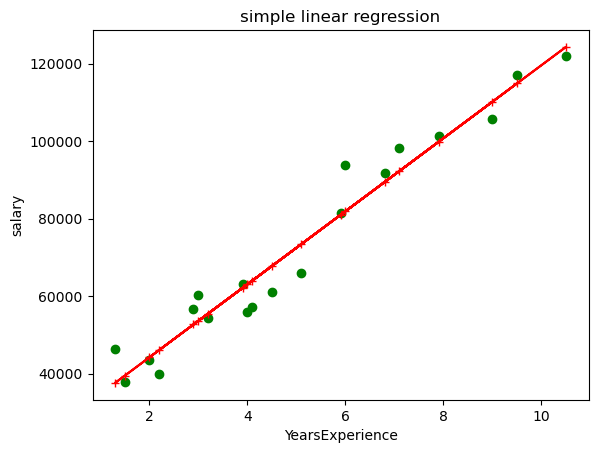

In [82]:
plt.title('simple linear regression')
plt.xlabel('YearsExperience')
plt.ylabel('salary')
plt.scatter(x_train,y_train,color="g")
plt.plot(x_train,y_train_pred,color="r",marker="+")
plt.show()

# FINDING THE ACCURACY FOR THE TRAINING DATA

In [84]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)   ##R**2=summation (1-(y_train-ytrainpred)**2)/summation(y_train-mean of y_train)**2

0.9549236946181227

# TEST DATA

In [87]:
x_test_1=x_test.flatten()
x_test_1

array([ 9.6,  4.9,  8.2,  5.3,  3.2,  3.7, 10.3,  8.7,  4. ,  1.1])

In [86]:
y_test_pred=reg.predict(x_test)
y_test_pred

array([117389.88968953,  73353.44332715, 104272.65034754,  77101.22599629,
        57425.36698332,  62110.09531974, 123948.50936052, 108957.37868397,
        64920.93232159,  37749.50797034])

In [88]:
testdatacomparison=pd.DataFrame({'x_test':x_test_1,"y_test_actual":y_test,"y_test_pred":y_test_pred})
testdatacomparison

,x_test,y_test_actual,y_test_pred
27,9.6,112635.0,117389.889690
15,4.9,67938.0,73353.443327
23,8.2,113812.0,104272.650348
17,5.3,83088.0,77101.225996
8,3.2,64445.0,57425.366983
9,3.7,57189.0,62110.095320
28,10.3,122391.0,123948.509361
24,8.7,109431.0,108957.378684
12,4.0,56957.0,64920.932322
0,1.1,39343.0,37749.507970


# plot the graph for x_test and y_test and y_test_pred

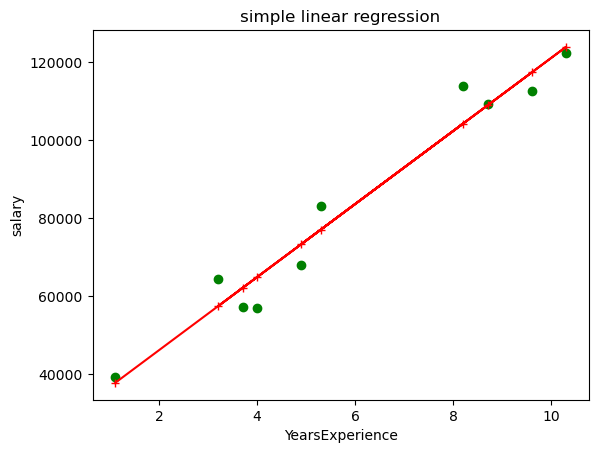

In [89]:
plt.title('simple linear regression')
plt.xlabel('YearsExperience')
plt.ylabel('salary')
plt.scatter(x_test,y_test,color="g")
plt.plot(x_test,y_test_pred,color="r",marker="+")
plt.show()

In [90]:
r2_score(y_test,y_test_pred)

0.9593749065233542

# checking the real data

# reg.predict([[15]])     ###for 15 years the salary of the employee will be 167984.95572289

In [93]:
reg.predict([[15]])

array([167984.95572289])

In [99]:
y1 = 9514.52350354 * 15 + 25630.510121837848 
y1

168348.36267493785

# finding the loss

In [95]:
lossofthemodel=1-0.9593749065233542  ##loss of the model =1- accuracy
lossofthemodel

0.04062509347664578

In [98]:
lossofthemodell=1-r2_score(y_test,y_test_pred)
lossofthemodell

0.04062509347664578

# OPTIMIZER ALGORITHM=to reduce the loss of the model 1.gradient descent (uses derivative of loss function)

In [101]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_test_pred)

32088267.141795684

# gradient descent manually

In [104]:
def grad_des(X_test,y_test):
    m = 0
    c = 0
    learning_rate = 0.01
    n = len(X_test)
    plt.scatter(X_test,y_test,color = 'r')
    for i in range(600):
        y_preditions = m * X_test + c
        plt.plot(X_test , y_preditions,color = 'b')
        acc = r2_score(y_test,y_preditions)  # acc
        # cost fun form = 1/n * (y - y_pre)**2
        cost_fun = (1/n) * sum([j**2 for j in (y_test - y_preditions)])
        # Derivative of slope 
        print('slope :',m, 'Inter :',c,'cost_fun :',cost_fun , 'acc : ',acc)
        d_s = -(2/n) * sum(X_test*(y_test - y_preditions))
        d_c = -(2 /n) * sum(y_test - y_preditions)
       
       
        # step_size
        
        
        
        # Updating mean and intercept 
        
        m = m - learning_rate * d_s
        c = c - learning_rate * d_c

slope : 0 Inter : 0 cost_fun : 7632941404.3 acc :  -8.66362429860071
slope : 11378.8452 Inter : 1654.4580000000003 cost_fun : 261076798.8825286 acc :  0.6694658109047192
slope : 12676.068492432001 Inter : 1933.1231064000003 cost_fun : 162479482.20104697 acc :  0.7942941535831044
slope : 12813.32981691218 Inter : 2053.142562165024 cost_fun : 160182222.76062432 acc :  0.797202580488642
slope : 12817.170716450728 Inter : 2154.5647925260864 cost_fun : 159167624.6965295 acc :  0.7984871042372426
slope : 12805.7066656516 Inter : 2253.505352134379 cost_fun : 158177673.1293581 acc :  0.7997404244859171
slope : 12792.528054715007 Inter : 2351.8198585448026 cost_fun : 157195653.24551243 acc :  0.8009837028904774
slope : 12779.198436348133 Inter : 2449.723150917536 cost_fun : 156221284.52146825 acc :  0.8022172946054833
slope : 12765.897535103153 Inter : 2547.2412724101055 cost_fun : 155254504.47194412 acc :  0.8034412787399247
slope : 12752.645850559737 Inter : 2644.3785378197313 cost_fun : 1542

slope : 11527.584183313526 Inter : 11624.062822339012 cost_fun : 81815885.5736143 acc :  0.8964176536983095
slope : 11519.163728447398 Inter : 11685.784632261237 cost_fun : 81428594.01815924 acc :  0.8969079810685459
slope : 11510.776128016336 Inter : 11747.26561965922 cost_fun : 81044318.78951927 acc :  0.8973944896423891
slope : 11502.421253830835 Inter : 11808.506724160108 cost_fun : 80663036.395761 acc :  0.8978772091616134
slope : 11494.09897820156 Inter : 11869.508881724867 cost_fun : 80284723.527912 acc :  0.8983561691363565
slope : 11485.809173937383 Inter : 11930.273024662585 cost_fun : 79909357.05853653 acc :  0.898831398846923
slope : 11477.551714343443 Inter : 11990.800081644722 cost_fun : 79536914.04032116 acc :  0.8993029273455753
slope : 11469.32647321921 Inter : 12051.090977719301 cost_fun : 79167371.70467192 acc :  0.8997707834583092
slope : 11461.133324856553 Inter : 12111.146634325049 cost_fun : 78800707.46032272 acc :  0.9002349957866163
slope : 11452.97214403783 In

slope : 10613.067854914123 Inter : 18327.454015527066 cost_fun : 48600762.0001523 acc :  0.9384693947302412
slope : 10608.215606018342 Inter : 18363.020928336657 cost_fun : 48472158.41888678 acc :  0.938632212263742
slope : 10603.38228934164 Inter : 18398.44906825976 cost_fun : 48344556.43557818 acc :  0.9387937617321758
slope : 10598.567831015398 Inter : 18433.73897675225 cost_fun : 48217948.24952262 acc :  0.9389540530115611
slope : 10593.772157459214 Inter : 18468.89119315739 cost_fun : 48092326.12077 acc :  0.9391130959009997
slope : 10588.995195379779 Inter : 18503.906254714053 cost_fun : 47967682.36965082 acc :  0.9392709001232757
slope : 10584.236871769754 Inter : 18538.78469656496 cost_fun : 47844009.37630724 acc :  0.9394274753254491
slope : 10579.497113906657 Inter : 18573.527051764828 cost_fun : 47721299.580226414 acc :  0.9395828310794465
slope : 10574.775849351747 Inter : 18608.133851288545 cost_fun : 47599545.479778945 acc :  0.9397369768826457
slope : 10570.073005948927 

slope : 10254.52003511441 Inter : 20955.60424417172 cost_fun : 40451846.557661735 acc :  0.9487862638251529
slope : 10251.066746993343 Inter : 20980.916795144785 cost_fun : 40386708.83775291 acc :  0.9488687309134646
slope : 10247.626932708563 Inter : 21006.130583096674 cost_fun : 40322078.42725605 acc :  0.9489505557267606
slope : 10244.200539688647 Inter : 21031.24599337513 cost_fun : 40257951.375114165 acc :  0.9490317432672448
slope : 10240.787515567297 Inter : 21056.26340982437 cost_fun : 40194323.7610422 acc :  0.9491122984981629
slope : 10237.387808182531 Inter : 21081.18321479094 cost_fun : 40131191.695287235 acc :  0.9491922263441054
slope : 10234.00136557589 Inter : 21106.005789129584 cost_fun : 40068551.31839081 acc :  0.9492715316913086
slope : 10230.628135991643 Inter : 21130.731512209037 cost_fun : 40006398.800952956 acc :  0.9493502193879537
slope : 10227.268067875999 Inter : 21155.360761917844 cost_fun : 39944730.34339792 acc :  0.9494282942444632
slope : 10223.92110987

slope : 9972.832766218113 Inter : 23020.367768796266 cost_fun : 35975312.92732667 acc :  0.9544537433552903
slope : 9970.47854889921 Inter : 23037.624147006605 cost_fun : 35945039.60928174 acc :  0.9544920706470069
slope : 9968.133517126842 Inter : 23054.813195296367 cost_fun : 35915002.06766861 acc :  0.9545300994358614
slope : 9965.797635061386 Inter : 23071.935176369472 cost_fun : 35885198.46619937 acc :  0.9545678320466714
slope : 9963.470867003054 Inter : 23088.99035190484 cost_fun : 35855626.982887715 acc :  0.9546052707861481
slope : 9961.15317739135 Inter : 23105.97898256038 cost_fun : 35826285.80993737 acc :  0.9546424179430374
slope : 9958.844530804525 Inter : 23122.901327976993 cost_fun : 35797173.15363173 acc :  0.9546792757882598
slope : 9956.544891959036 Inter : 23139.75764678252 cost_fun : 35768287.23422398 acc :  0.9547158465750497
slope : 9954.25422570901 Inter : 23156.548196595704 cost_fun : 35739626.28582852 acc :  0.9547521325390923
slope : 9951.972497045701 Inter :

slope : 9746.898317416533 Inter : 24676.46394477711 cost_fun : 33609315.740292825 acc :  0.9574491951340975
slope : 9745.425637828654 Inter : 24687.25866442642 cost_fun : 33597469.42035613 acc :  0.9574641930725233
slope : 9743.958704255288 Inter : 24698.01126587411 cost_fun : 33585715.362623364 acc :  0.9574790742031251
slope : 9742.497494276979 Inter : 24708.7219134545 cost_fun : 33574052.84853267 acc :  0.9574938394356325
slope : 9741.041985561737 Inter : 24719.39077086073 cost_fun : 33562481.16511851 acc :  0.9575084896726896
slope : 9739.592155864711 Inter : 24730.01800114723 cost_fun : 33550999.604967996 acc :  0.9575230258099111
slope : 9738.147983027842 Inter : 24740.60376673225 cost_fun : 33539607.466177866 acc :  0.9575374487359359
slope : 9736.709444979526 Inter : 24751.148229400318 cost_fun : 33528304.0523115 acc :  0.9575517593324819
slope : 9735.276519734278 Inter : 24761.651550304727 cost_fun : 33517088.672356155 acc :  0.9575659584744003
slope : 9733.84918539239 Inter :

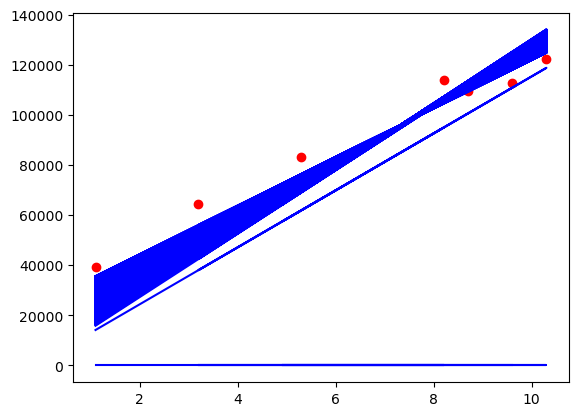

In [105]:
x_test_1=x_test.flatten()
grad_des(x_test_1,y_test)

In [125]:
def grad_des(X_test,y_test):
    m = 0
    c = 0
    learning_rate = 0.01
    n = len(X_test)
    plt.scatter(X_test,y_test,color = 'r')
    for i in range(600):
        y_preditions = m * X_test + c
        plt.plot(X_test , y_preditions,color = 'b')
        acc = r2_score(y_test,y_preditions)  # acc
        # cost fun form = 1/n * (y - y_pre)**2
      
        # Derivative of slope 
        print('slope :',m, 'Inter :',c,'cost_fun :',"cost_fun" , 'acc : ',acc)
        d_s = -(2/n) * sum(X_test*(y_test - y_preditions))
        d_c = -(2 /n) * sum(y_test - y_preditions)
       
       
        # step_size
        
        
        
        # Updating mean and intercept 
        
        m = m - learning_rate * d_s
        c = c - learning_rate * d_c

slope : 0 Inter : 0 cost_fun : cost_fun acc :  -8.66362429860071
slope : 11378.8452 Inter : 1654.4580000000003 cost_fun : cost_fun acc :  0.6694658109047192
slope : 12676.068492432001 Inter : 1933.1231064000003 cost_fun : cost_fun acc :  0.7942941535831044
slope : 12813.32981691218 Inter : 2053.142562165024 cost_fun : cost_fun acc :  0.797202580488642
slope : 12817.170716450728 Inter : 2154.5647925260864 cost_fun : cost_fun acc :  0.7984871042372426
slope : 12805.7066656516 Inter : 2253.505352134379 cost_fun : cost_fun acc :  0.7997404244859171
slope : 12792.528054715007 Inter : 2351.8198585448026 cost_fun : cost_fun acc :  0.8009837028904774
slope : 12779.198436348133 Inter : 2449.723150917536 cost_fun : cost_fun acc :  0.8022172946054833
slope : 12765.897535103153 Inter : 2547.2412724101055 cost_fun : cost_fun acc :  0.8034412787399247
slope : 12752.645850559737 Inter : 2644.3785378197313 cost_fun : cost_fun acc :  0.8046557301686661
slope : 12739.445562296687 Inter : 2741.1367566972

slope : 11342.00323389033 Inter : 12984.368443305066 cost_fun : cost_fun acc :  0.9067797085783347
slope : 11334.306867847057 Inter : 13040.782692839906 cost_fun : cost_fun acc :  0.9071893335847991
slope : 11326.640531031711 Inter : 13096.976828577155 cost_fun : cost_fun acc :  0.907595768325755
slope : 11319.004106278015 Inter : 13152.95170934387 cost_fun : cost_fun acc :  0.9079990376478152
slope : 11311.397476876848 Inter : 13208.708190616187 cost_fun : cost_fun acc :  0.9083991662040811
slope : 11303.820526574456 Inter : 13264.247124532396 cost_fun : cost_fun acc :  0.908796178455649
slope : 11296.273139570683 Inter : 13319.569359905961 cost_fun : cost_fun acc :  0.909190098673106
slope : 11288.755200517187 Inter : 13374.675742238502 cost_fun : cost_fun acc :  0.9095809509380135
slope : 11281.266594515691 Inter : 13429.567113732704 cost_fun : cost_fun acc :  0.9099687591443798
slope : 11273.807207116219 Inter : 13484.244313305198 cost_fun : cost_fun acc :  0.91035354700012
slope :

slope : 10501.692679171056 Inter : 19143.832410347575 cost_fun : cost_fun acc :  0.9420462261641736
slope : 10497.274987379062 Inter : 19176.21402599844 cost_fun : cost_fun acc :  0.9421811864092433
slope : 10492.87453227682 Inter : 19208.46929696774 cost_fun : cost_fun acc :  0.942315095549014
slope : 10488.491246611235 Inter : 19240.598716219723 cost_fun : cost_fun acc :  0.9424479617697659
slope : 10484.125063391602 Inter : 19272.602774795203 cost_fun : cost_fun acc :  0.9425797931940216
slope : 10479.77591588861 Inter : 19304.48196181909 cost_fun : cost_fun acc :  0.9427105978810445
slope : 10475.443737633297 Inter : 19336.236764507852 cost_fun : cost_fun acc :  0.9428403838273293
slope : 10471.128462416058 Inter : 19367.867668176965 cost_fun : cost_fun acc :  0.9429691589670924
slope : 10466.83002428561 Inter : 19399.37515624833 cost_fun : cost_fun acc :  0.9430969311727568
slope : 10462.548357547998 Inter : 19430.759710257662 cost_fun : cost_fun acc :  0.9432237082554324
slope : 

slope : 10006.776698804004 Inter : 22771.55924379522 cost_fun : cost_fun acc :  0.9538844722412894
slope : 10004.290041047298 Inter : 22789.78640846044 cost_fun : cost_fun acc :  0.953927233163696
slope : 10001.813085585432 Inter : 22807.94245544765 cost_fun : cost_fun acc :  0.9539696610529778
slope : 9999.345794562563 Inter : 22826.027662239616 cost_fun : cost_fun acc :  0.954011758502883
slope : 9996.88813027055 Inter : 22844.042305236442 cost_fun : cost_fun acc :  0.954053528086959
slope : 9994.440055148385 Inter : 22861.98665975979 cost_fun : cost_fun acc :  0.9540949723587095
slope : 9992.001531781607 Inter : 22879.861000057084 cost_fun : cost_fun acc :  0.9541360938517512
slope : 9989.57252290174 Inter : 22897.665599305714 cost_fun : cost_fun acc :  0.9541768950799682
slope : 9987.152991385718 Inter : 22915.400729617195 cost_fun : cost_fun acc :  0.9542173785376656
slope : 9984.742900255322 Inter : 22933.066662041336 cost_fun : cost_fun acc :  0.9542575466997227
slope : 9982.342

slope : 9757.369864701532 Inter : 24599.707657689087 cost_fun : cost_fun acc :  0.9573408610149721
slope : 9755.856327846941 Inter : 24610.801860500524 cost_fun : cost_fun acc :  0.9573567026875407
slope : 9754.348696421343 Inter : 24621.852776604574 cost_fun : cost_fun acc :  0.9573724209810653
slope : 9752.846947383283 Inter : 24632.860574894763 cost_fun : cost_fun acc :  0.9573880168564542
slope : 9751.35105778121 Inter : 24643.825423605642 cost_fun : cost_fun acc :  0.9574034912671314
slope : 9749.861004753118 Inter : 24654.747490315345 cost_fun : cost_fun acc :  0.9574188451590955
slope : 9748.376765526207 Inter : 24665.62694194817 cost_fun : cost_fun acc :  0.9574340794709773
slope : 9746.898317416533 Inter : 24676.46394477711 cost_fun : cost_fun acc :  0.9574491951340975
slope : 9745.425637828654 Inter : 24687.25866442642 cost_fun : cost_fun acc :  0.9574641930725233
slope : 9743.958704255288 Inter : 24698.01126587411 cost_fun : cost_fun acc :  0.9574790742031251
slope : 9742.49

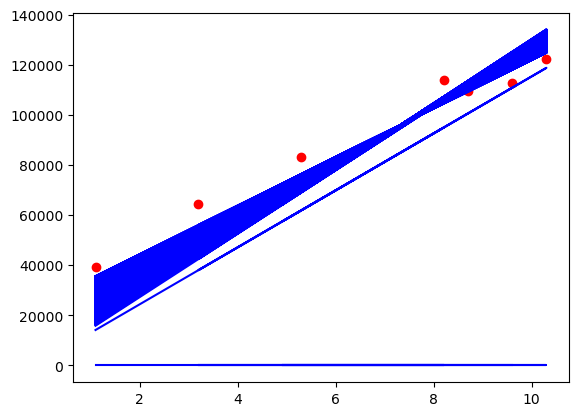

In [126]:
x_test_1=x_test.flatten()
grad_des(x_test_1,y_test)